# Libraries and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F


from scipy.io import loadmat
import math
import matplotlib.colors
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

#from utils import plot_images
#num_train_points
from IPython.display import HTML
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

warnings.filterwarnings('ignore')

In [2]:
data = loadmat('MNIST.mat')
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'input_images', 'output_labels'])

In [3]:
input_imgs = data['input_images']
header= data['__header__']
version= data['__version__']
globs= data['__globals__']
outs= data['output_labels']

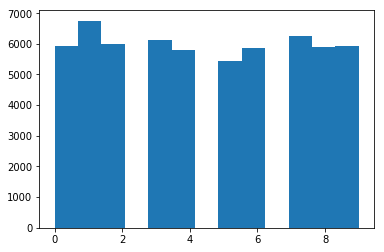

In [4]:
n, bins, patches=plt.hist(outs, bins=13)

In [5]:
a = [i for i in n if i!=0]
print('Number of clsses in output layer is', len(a))

Number of clsses in output layer is 10


In [6]:
full_data=[]
for i in range(0,len(input_imgs)):
    full_data.append([input_imgs[i],int(outs[i])])
#SPLIT
x_train, x_test = train_test_split(full_data, test_size = 0.5)
# validate set shapes
print(np.shape(x_train), np.shape(x_test))

(30000, 2) (30000, 2)


In [7]:
#fig = plt.figure(figsize=(20,10))
#for i in range(9):
#    plt.subplot(3,3,i+1)
#    plt.tight_layout()
#    plt.imshow(x_train[i][0], cmap='gray', interpolation='none')
#    plt.title("Ground Truth: {}".format(y_train[i]))
#    plt.xticks([])
#    plt.yticks([])

In [8]:
###########################################################################################################
###################################TRAIN AND TEST LOADER###################################################
###########################################################################################################
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)
train_loader = torch.utils.data.DataLoader(dataset=x_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=x_test, batch_size=batch_size, shuffle=False)

# 1 Hidden Layer Feedforward Neural Network (Sigmoid Activation)# 

In [9]:
#################################################################################################
#############################################FEED FORWARD#######################################
#################################################################################################
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, in_dim, h_dim, out_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(in_dim, h_dim) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(h_dim, out_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out


In [10]:
in_dim = 28*28
h_dim = 100
out_dim = 10
model_ff = FeedforwardNeuralNetModel(in_dim, h_dim, out_dim)
#print(model_ff)
print(model_ff.parameters())

print(len(list(model_ff.parameters())))
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model_ff.parameters(), lr=learning_rate)


# FC 1 Parameters
print('FC 1 Parameters:',list(model_ff.parameters())[0].size())

# FC 1 Bias Parameters
print('FC 1 Bias Parameters:',list(model_ff.parameters())[1].size())

# FC 2 Parameters
print('FC 2 Parameters:',list(model_ff.parameters())[2].size())

# FC 2 Bias Parameters
print('FC 2 Bias Parameters',list(model_ff.parameters())[3].size())


<generator object Module.parameters at 0x7fe4a9816b88>
4
FC 1 Parameters: torch.Size([100, 784])
FC 1 Bias Parameters: torch.Size([100])
FC 2 Parameters: torch.Size([10, 100])
FC 2 Bias Parameters torch.Size([10])


In [11]:
#Train the model
#Convert inputs to tensors with gradient accumulation capabilities
#Clear gradient buffers
#Get output given inputs
#Get loss
#Get gradients w.r.t. parameters
#Update parameters using gradients
#parameters = parameters - learning_rate * parameters_gradients
#REPEAT


In [12]:
rates= [0.0001,0.001,0.01,0.05,0.1]
acc_dic={}
loss_dic={}
for j in rates:
    print('THE LEARNING RATE IS:', j)
    learning_rate = j
    optimizer = torch.optim.SGD(model_ff.parameters(), lr=learning_rate)
   

    iter = 0
    acc=[]
    lloss=[]
    time=[]
    wrong=[]
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
            images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
            optimizer.zero_grad()
        
        # Forward pass to get output/logits
            outputs = model_ff(images)
        #calculate loss
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            iter += 1
            if iter%500==0:
                correct= 0
                total= 0
                wrng= 0
                for imags,lbls in test_loader:
                    imags= imags.view(-1,28*28).requires_grad_()
                    outputs= model_ff(imags)
                    _, predicted = torch.max(outputs.data, 1)
                    total += lbls.size(0)
                #print(total)
                    correct += (predicted == lbls).sum()
                #print(correct)
                    wrng += (predicted != lbls).sum()
                #print(wrng)
                accuracy = 100*correct/total
                acc.append(accuracy)
                lloss.append(loss.item())
                wrong.append(wrng)
                time.append(iter)
                print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
    acc_dic[j]= acc
    loss_dic[j]= lloss

THE LEARNING RATE IS: 0.0001
Iteration: 500. Loss: 2.3448374271392822. Accuracy: 9
Iteration: 1000. Loss: 2.3434014320373535. Accuracy: 9
Iteration: 1500. Loss: 2.3364005088806152. Accuracy: 9
Iteration: 2000. Loss: 2.2996833324432373. Accuracy: 9
Iteration: 2500. Loss: 2.2951347827911377. Accuracy: 9
Iteration: 3000. Loss: 2.3140738010406494. Accuracy: 9
THE LEARNING RATE IS: 0.001
Iteration: 500. Loss: 2.288977861404419. Accuracy: 13
Iteration: 1000. Loss: 2.27248477935791. Accuracy: 12
Iteration: 1500. Loss: 2.253634452819824. Accuracy: 18
Iteration: 2000. Loss: 2.247882127761841. Accuracy: 22
Iteration: 2500. Loss: 2.236635684967041. Accuracy: 31
Iteration: 3000. Loss: 2.2146658897399902. Accuracy: 36
THE LEARNING RATE IS: 0.01
Iteration: 500. Loss: 2.0144448280334473. Accuracy: 59
Iteration: 1000. Loss: 1.6529921293258667. Accuracy: 68
Iteration: 1500. Loss: 1.348958134651184. Accuracy: 72
Iteration: 2000. Loss: 1.0466047525405884. Accuracy: 77
Iteration: 2500. Loss: 1.01295316219

loss plot of learning rate 0.0001


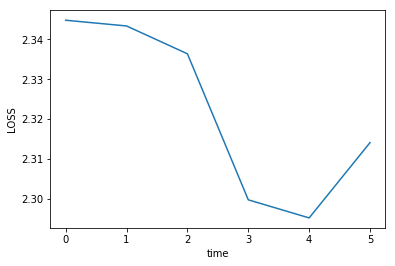

loss plot of learning rate 0.001


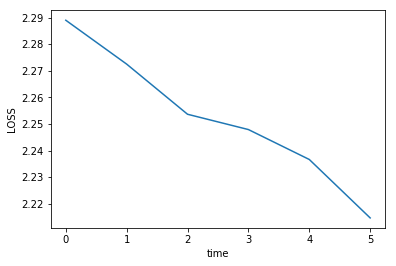

loss plot of learning rate 0.01


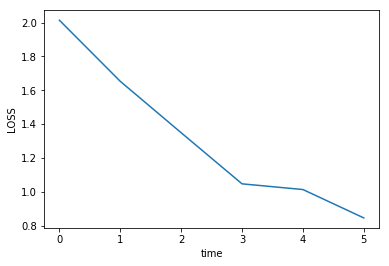

loss plot of learning rate 0.05


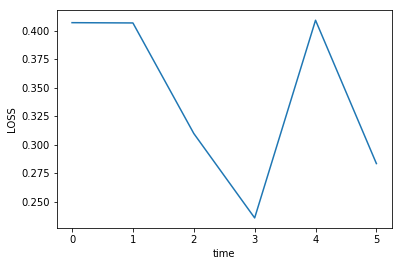

loss plot of learning rate 0.1


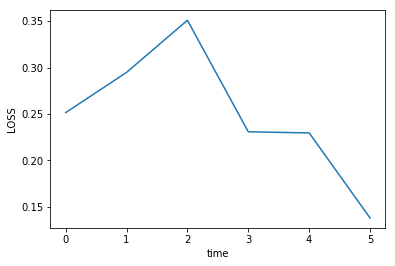

In [13]:
###########################LOSS PLOTS################################################
for j in loss_dic:
    print('loss plot of learning rate',j)
    plt.plot(loss_dic[j])
    plt.xlabel('time')
    plt.ylabel('LOSS')
    plt.show()

# 1 Hidden Layer Feedforward Neural Network (ReLU Activation)


In [14]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()
        
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

    
    
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model_ff_Relu = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


In [15]:
##########################################################################
#############################TRAIN one hidden layer FF_Relu###############
##########################################################################
rates= [0.00001,0.0001,0.001,0.002,0.005,0.01,0.02,0.03,0.05,0.07,0.1,0.12,0.15,0.2,0.3]
acc_dic_relu={}
loss_dic_relu={}
acc_relu=[]
lloss_relu=[]
corr=[]
wrong=[]
for j in rates:
    print('THE LEARNING RATE IS:', j)
    learning_rate = j
    optimizer = torch.optim.SGD(model_ff_Relu.parameters(), lr=learning_rate)
    iter = 0
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
            images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
            optimizer.zero_grad()
        
        # Forward pass to get output/logits
            outputs = model_ff_Relu(images)
        
        # Calculate Loss: softmax --> cross entropy loss
            loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
            loss.backward()
        
        # Updating parameters
            optimizer.step()
        
            iter += 1
        
            if iter % 300 == 0:
            # Calculate Accuracy         
                correct = 0
                total = 0
                accuracy=0
            # Iterate through test dataset
                for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                    images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                    outputs = model_ff_Relu(images)
                
                # Get predictions from the maximum value
                    _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                    total += labels.size(0)
                
                # Total correct predictions
                    correct += (predicted == labels).sum()
                    corr.append(correct)
                    wrng+= (predicted != labels).sum()
                    wrong.append(wrng)
                    
                    accuracy = 100*correct/total
                acc_relu.append(accuracy)
                lloss_relu.append(loss.item())
                print('Iteration: {}. Loss: {}. Accuracy: {}. correct: {}'.format(iter, loss.item(), accuracy, correct))
    acc_dic_relu[j]=acc
    loss_dic_relu[j]=lloss_relu

THE LEARNING RATE IS: 1e-05
Iteration: 300. Loss: 2.3091652393341064. Accuracy: 11. correct: 3430
Iteration: 600. Loss: 2.301508903503418. Accuracy: 11. correct: 3433
Iteration: 900. Loss: 2.3094987869262695. Accuracy: 11. correct: 3434
Iteration: 1200. Loss: 2.3015291690826416. Accuracy: 11. correct: 3441
Iteration: 1500. Loss: 2.3072681427001953. Accuracy: 11. correct: 3442
Iteration: 1800. Loss: 2.3084475994110107. Accuracy: 11. correct: 3444
Iteration: 2100. Loss: 2.291454792022705. Accuracy: 11. correct: 3448
Iteration: 2400. Loss: 2.3004701137542725. Accuracy: 11. correct: 3456
Iteration: 2700. Loss: 2.2946834564208984. Accuracy: 11. correct: 3455
Iteration: 3000. Loss: 2.2980539798736572. Accuracy: 11. correct: 3467
THE LEARNING RATE IS: 0.0001
Iteration: 300. Loss: 2.299294948577881. Accuracy: 11. correct: 3516
Iteration: 600. Loss: 2.290756940841675. Accuracy: 11. correct: 3560
Iteration: 900. Loss: 2.3024353981018066. Accuracy: 12. correct: 3612
Iteration: 1200. Loss: 2.30011

Iteration: 300. Loss: 0.04792742803692818. Accuracy: 96. correct: 28830
Iteration: 600. Loss: 0.04586330056190491. Accuracy: 96. correct: 28975
Iteration: 900. Loss: 0.02171628549695015. Accuracy: 96. correct: 28959
Iteration: 1200. Loss: 0.011236165650188923. Accuracy: 96. correct: 29064
Iteration: 1500. Loss: 0.04214287921786308. Accuracy: 96. correct: 28928
Iteration: 1800. Loss: 0.02066834457218647. Accuracy: 97. correct: 29122
Iteration: 2100. Loss: 0.005478180479258299. Accuracy: 97. correct: 29142
Iteration: 2400. Loss: 0.0011662398464977741. Accuracy: 97. correct: 29162
Iteration: 2700. Loss: 0.003271147608757019. Accuracy: 97. correct: 29177
Iteration: 3000. Loss: 0.0011408329010009766. Accuracy: 97. correct: 29178
THE LEARNING RATE IS: 0.15
Iteration: 300. Loss: 0.0013965233229100704. Accuracy: 97. correct: 29178
Iteration: 600. Loss: 0.001308336853981018. Accuracy: 97. correct: 29187
Iteration: 900. Loss: 0.0006552089471369982. Accuracy: 97. correct: 29187
Iteration: 1200. L

loss plot of learning rate: 1e-05


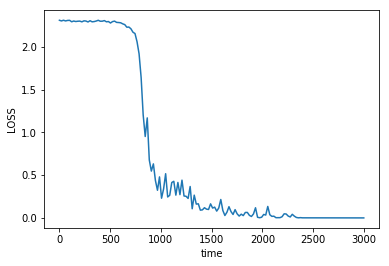

loss plot of learning rate: 0.0001


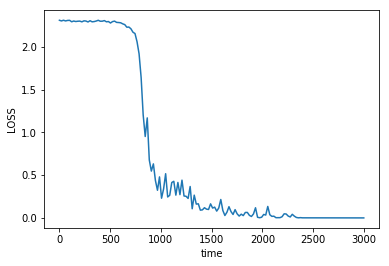

loss plot of learning rate: 0.001


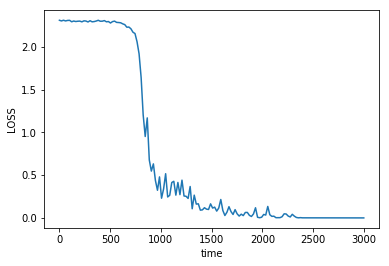

loss plot of learning rate: 0.002


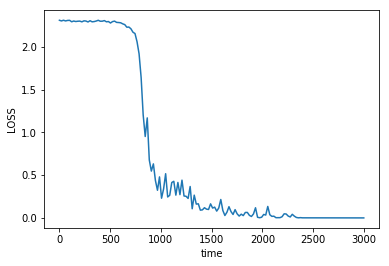

loss plot of learning rate: 0.005


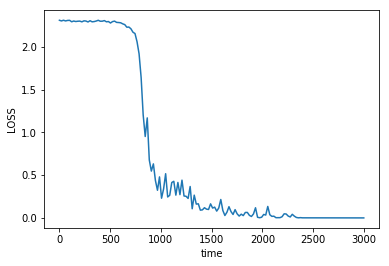

loss plot of learning rate: 0.01


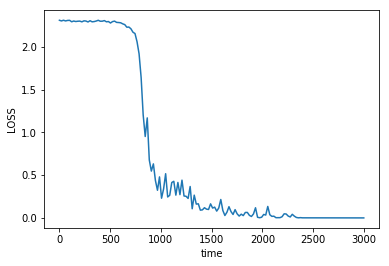

loss plot of learning rate: 0.02


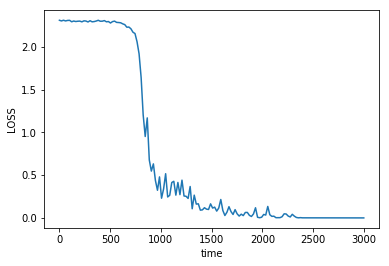

loss plot of learning rate: 0.03


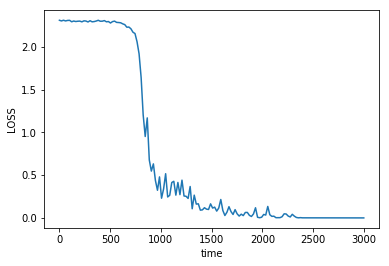

loss plot of learning rate: 0.05


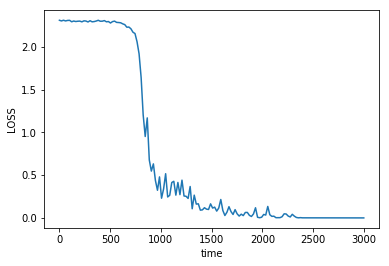

loss plot of learning rate: 0.07


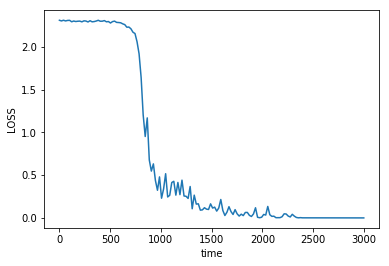

loss plot of learning rate: 0.1


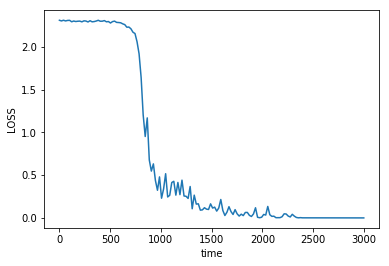

loss plot of learning rate: 0.12


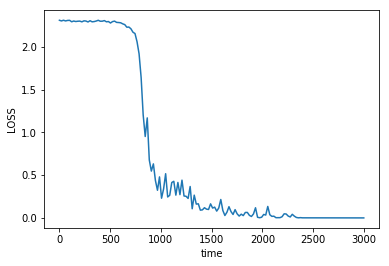

loss plot of learning rate: 0.15


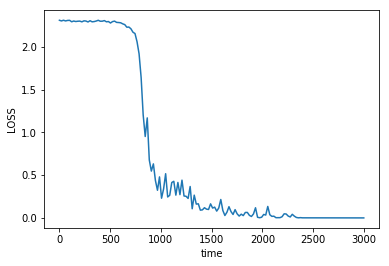

loss plot of learning rate: 0.2


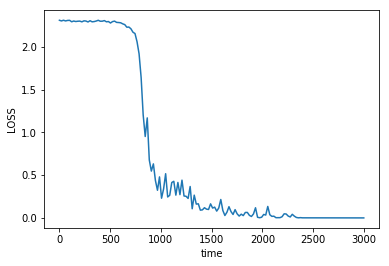

loss plot of learning rate: 0.3


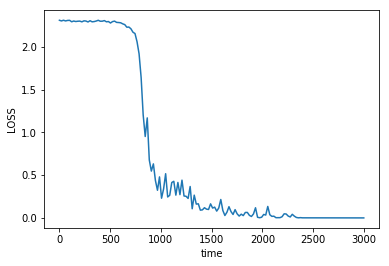

In [16]:
t=np.linspace(0,3000,150)
for k in loss_dic_relu:
    print('loss plot of learning rate:',k)
    t=np.linspace(0,3000,len(loss_dic_relu[k]))
    plt.plot(t,loss_dic_relu[k])
    plt.xlabel('time')
    plt.ylabel('LOSS')
    plt.show()

In [ ]:
acc

# TWO Hidden Layers

In [17]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        
        # Linear function 3 (readout): 100 --> 10
        self.fc3 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 3 (readout)
        out = self.fc3(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model_2_relu = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)


In [18]:
##########################################################################
#############################TRAIN one hidden layer FF_Relu###############
##########################################################################
rates= [0.00001,0.0001,0.001,0.002,0.005,0.01,0.02,0.03,0.05,0.07,0.1,0.12,0.15,0.2,0.3]
acc_dic_relu2={}
loss_dic_relu2={}
acc_relu2=[]
lloss_relu2=[]
corr2=[]
wrong2=[]
for j in rates:
    print('THE LEARNING RATE IS:', j)
    learning_rate = j
    optimizer = torch.optim.SGD(model_2_relu.parameters(), lr=learning_rate)
    iter = 0
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
            images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
            optimizer.zero_grad()
        
        # Forward pass to get output/logits
            outputs = model_2_relu(images)
        
        # Calculate Loss: softmax --> cross entropy loss
            loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
            loss.backward()
        
        # Updating parameters
            optimizer.step()
        
            iter += 1
        
            if iter % 300 == 0:
            # Calculate Accuracy         
                correct = 0
                total = 0
                accuracy=0
            # Iterate through test dataset
                for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                    images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                    outputs = model_2_relu(images)
                
                # Get predictions from the maximum value
                    _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                    total += labels.size(0)
                
                # Total correct predictions
                    correct += (predicted == labels).sum()
                    corr2.append(correct)
                    wrng+= (predicted != labels).sum()
                    wrong2.append(wrng)
                    
                    accuracy = 100*correct/total
                acc_relu2.append(accuracy)
                lloss_relu2.append(loss.item())
                print('Iteration: {}. Loss: {}. Accuracy: {}. correct: {}'.format(iter, loss.item(), accuracy, correct))
    acc_dic_relu2[j]=acc
    loss_dic_relu2[j]=lloss_relu

THE LEARNING RATE IS: 1e-05
Iteration: 300. Loss: 2.3020784854888916. Accuracy: 8. correct: 2506
Iteration: 600. Loss: 2.309168815612793. Accuracy: 8. correct: 2508
Iteration: 900. Loss: 2.3023924827575684. Accuracy: 8. correct: 2516
Iteration: 1200. Loss: 2.3084537982940674. Accuracy: 8. correct: 2525
Iteration: 1500. Loss: 2.3071229457855225. Accuracy: 8. correct: 2530
Iteration: 1800. Loss: 2.312305450439453. Accuracy: 8. correct: 2536
Iteration: 2100. Loss: 2.3109731674194336. Accuracy: 8. correct: 2541
Iteration: 2400. Loss: 2.3083784580230713. Accuracy: 8. correct: 2541
Iteration: 2700. Loss: 2.299074411392212. Accuracy: 8. correct: 2543
Iteration: 3000. Loss: 2.3011386394500732. Accuracy: 8. correct: 2548
THE LEARNING RATE IS: 0.0001
Iteration: 300. Loss: 2.321915864944458. Accuracy: 8. correct: 2593
Iteration: 600. Loss: 2.3091330528259277. Accuracy: 8. correct: 2653
Iteration: 900. Loss: 2.297287702560425. Accuracy: 9. correct: 2703
Iteration: 1200. Loss: 2.289778709411621. Ac

Iteration: 300. Loss: 0.016096603125333786. Accuracy: 96. correct: 29086
Iteration: 600. Loss: 0.006168747320771217. Accuracy: 96. correct: 29055
Iteration: 900. Loss: 0.0027821939438581467. Accuracy: 97. correct: 29132
Iteration: 1200. Loss: 0.005993856117129326. Accuracy: 96. correct: 29091
Iteration: 1500. Loss: 0.05492544174194336. Accuracy: 97. correct: 29160
Iteration: 1800. Loss: 0.007138779386878014. Accuracy: 97. correct: 29112
Iteration: 2100. Loss: 0.010867987759411335. Accuracy: 96. correct: 29096
Iteration: 2400. Loss: 0.0032407939434051514. Accuracy: 97. correct: 29141
Iteration: 2700. Loss: 0.0011223644251003861. Accuracy: 97. correct: 29167
Iteration: 3000. Loss: 0.00321104284375906. Accuracy: 97. correct: 29150
THE LEARNING RATE IS: 0.15
Iteration: 300. Loss: 0.0035490531008690596. Accuracy: 97. correct: 29140
Iteration: 600. Loss: 0.0013952084118500352. Accuracy: 97. correct: 29142
Iteration: 900. Loss: 0.19561254978179932. Accuracy: 95. correct: 28573
Iteration: 1200

loss plot of learning rate: 1e-05


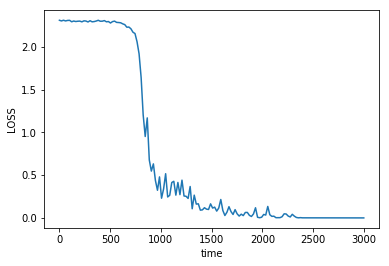

loss plot of learning rate: 0.0001


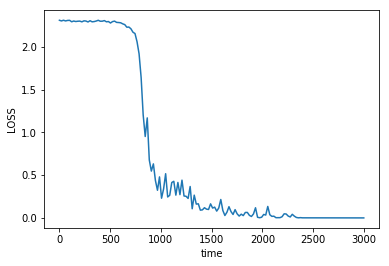

loss plot of learning rate: 0.001


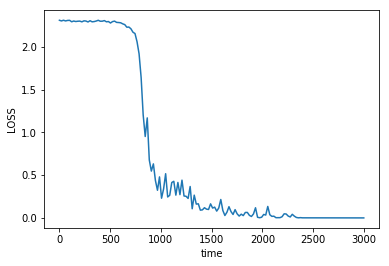

loss plot of learning rate: 0.002


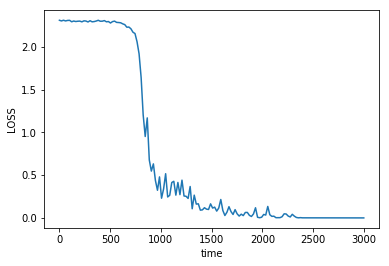

loss plot of learning rate: 0.005


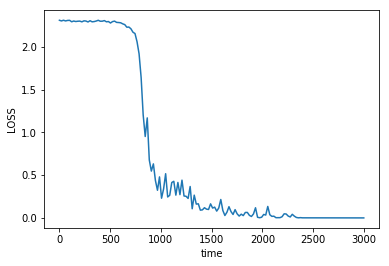

loss plot of learning rate: 0.01


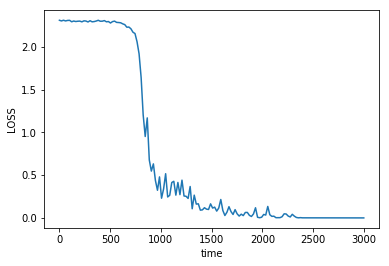

loss plot of learning rate: 0.02


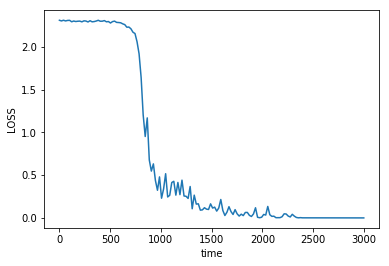

loss plot of learning rate: 0.03


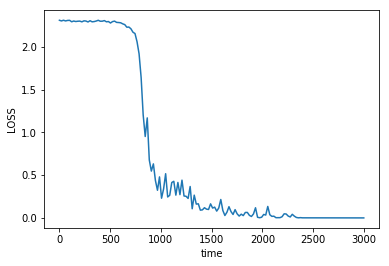

loss plot of learning rate: 0.05


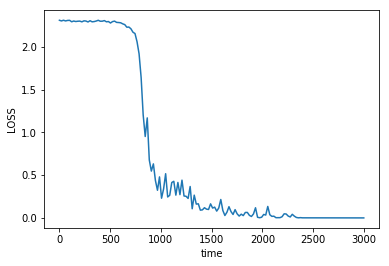

loss plot of learning rate: 0.07


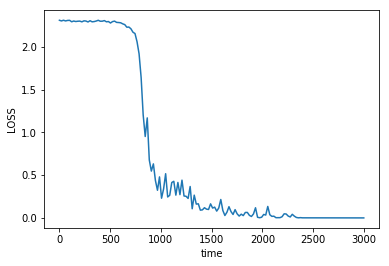

loss plot of learning rate: 0.1


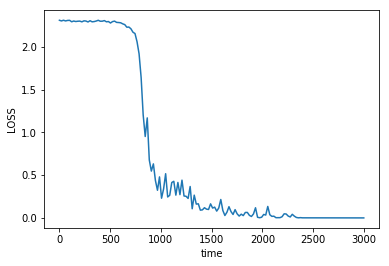

loss plot of learning rate: 0.12


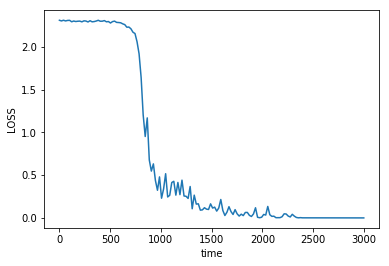

loss plot of learning rate: 0.15


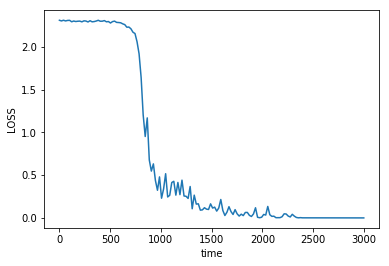

loss plot of learning rate: 0.2


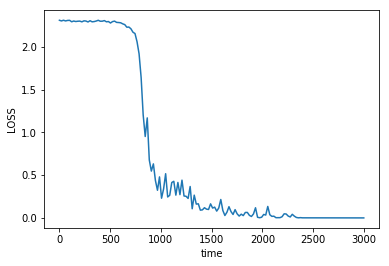

loss plot of learning rate: 0.3


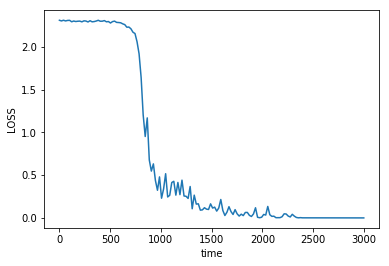

In [20]:
t=np.linspace(0,3000,150)
for k in loss_dic_relu2:
    print('loss plot of learning rate:',k)
    t=np.linspace(0,3000,len(loss_dic_relu2[k]))
    plt.plot(t,loss_dic_relu2[k])
    plt.xlabel('time')
    plt.ylabel('LOSS')
    plt.show()